In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Lets check and import Dataset:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.shape

(30, 17)

we can see here we have total 30 rows and 17 columns,from which we have 16 features and w (WINS)is our output data i.e. target variable

In [4]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


from above data description we can say that our dataset is normally distributed as there is no much difference between min and max, 
I can also say that it could not have much outliers. also data does not contain null values but we wiil verify it with another method also.
mean is the average for every dataset and std is staandard deviation. 

In [5]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Now we can clearly see that the data doesn't have any null values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


from above information we can see our dataset only contains integer datatype. data has not any object data

In [7]:
(df['W'].value_counts)


<bound method IndexOpsMixin.value_counts of 0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64>

from above value counts I can conclude that our data problem data is regression problem data we have to predict the no.of wins.

# EDA

DATA DISTRIBUTION:

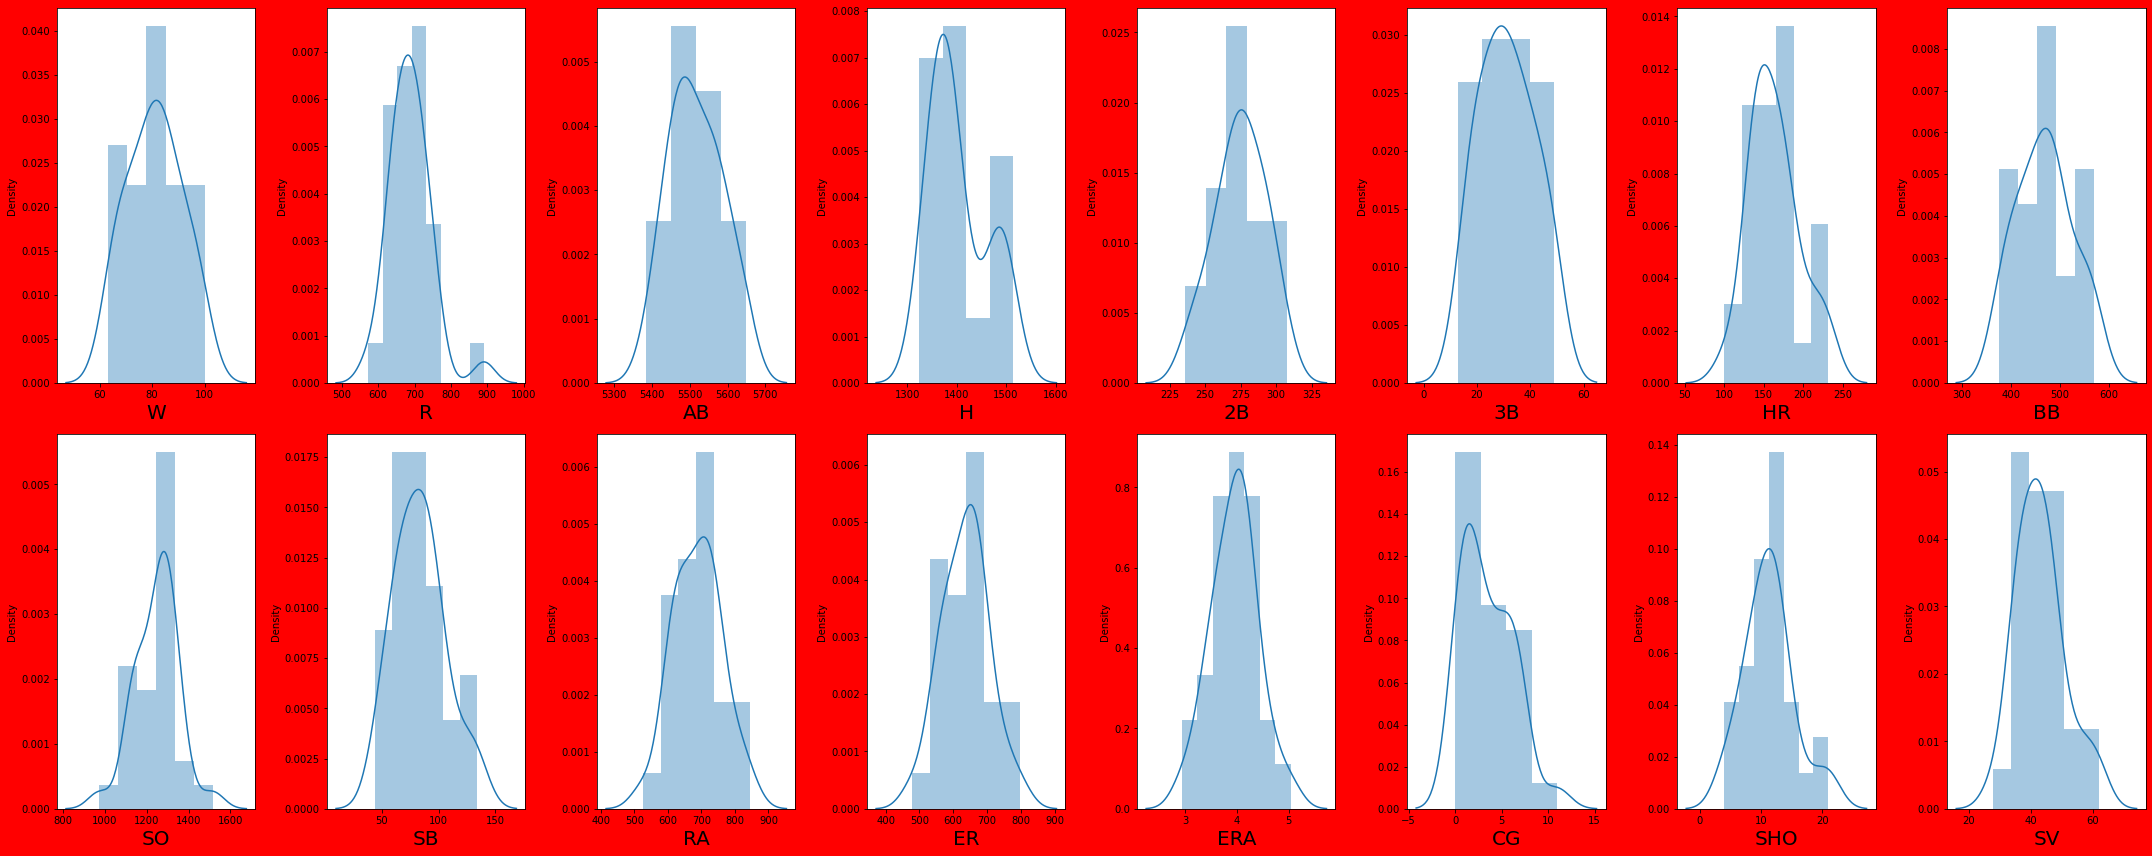

In [8]:
plt.figure(figsize =(30,12),facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber<=16:
        ax = plt.subplot(2,8,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize =20)

    plotnumber+=1
plt.tight_layout()

   

I have plotted the distribution plot for every feature in dataset to check the distribution of the data. from above graph data looks like normally distributed it has no skewness present in it. So we don't need to normalise the dataset. but we have to cross verify. lets check with another method.

In [9]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

but from above information I can see the data has skewness present in columns - 'H','HR','SB','CG','SHO','SV','E'. So we need to normalise our dataset to remove the skewness for these columns

# OUTLIERS CHECK:

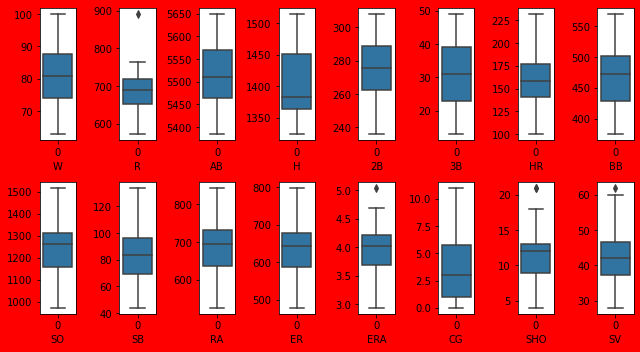

In [10]:
plt.figure(figsize =(9,5),facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber<=16:
        ax = plt.subplot(2,8,plotnumber)
        sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize =10)

    plotnumber+=1
plt.tight_layout()

I have used boxplot method to check the outliers in dataset and from above graph we can clearly see our data does not have so much 
outliers. it contain some outliers in columns --- 'R','ERA','SV'.  so we have to remvoe those outliers for better prediction. 
As our data is not large so I am using here Inter Quantile method to remove the outliers.

In [11]:
q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3-q1

we have the outliers for only higher side of the data.

In [12]:
r_high = (q3.R + (1.5 *iqr.R))
r_high

818.75

we have got the number 818.75 to detect outliers in column R means any data above 818.75 we an consider as outlier. so lets remove 

In [13]:
outliers = np.where(df['R'] > r_high)
df = df.drop(df.index[outliers])
print(df.shape)
df.reset_index()

(29, 17)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [14]:
era_high = (q3.ERA + (1.5 *iqr.ERA))
era_high

outliers1 = np.where(df['ERA'] > era_high)
df = df.drop(df.index[outliers1])
print(df.shape)
df.reset_index()

(28, 17)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [15]:
sho_high = (q3.SHO + (1.5 *iqr.SHO))
sho_high

outliers2 = np.where(df['SHO'] > sho_high)
df = df.drop(df.index[outliers2])
print(df.shape)
df.reset_index()

(26, 17)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [16]:
sv_high = (q3.SV + (1.5 *iqr.SV))
sv_high

outliers2 = np.where(df['SV'] > sv_high)
df = df.drop(df.index[outliers2])
print(df.shape)
df.reset_index()

(25, 17)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [17]:
df.shape

(25, 17)

now i have caluculated outliers and removed it.

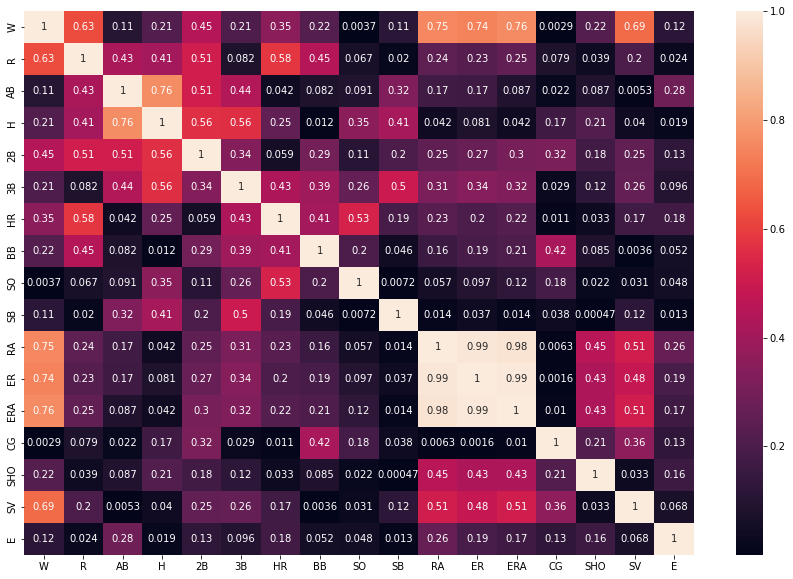

In [18]:
df_corr = df.corr().abs()

plt.figure(figsize =(15,10))
sns.heatmap(df_corr,annot = True, annot_kws={'size':10})
plt.show()

CORELATION BETWEEN FEARTURS AND TARGET VARIABLE:
    

From above heatmap we can clearly see that feature 'RA' is highly corerelated with 'ER' and 'ERA' means this three columns have
multicoliniearity, so lets check plot the grap to verify it.

<AxesSubplot:xlabel='ERA', ylabel='ER'>

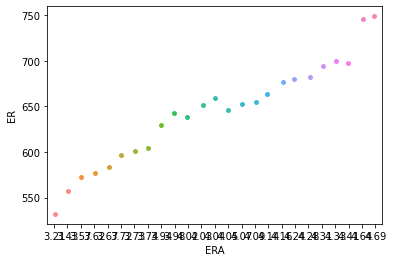

In [19]:
sns.stripplot(x = 'ERA',y= 'ER', data=df)

<AxesSubplot:xlabel='ER', ylabel='RA'>

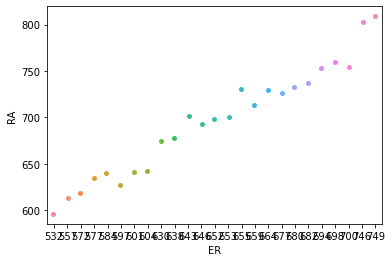

In [20]:
sns.stripplot(x = 'ER',y= 'RA', data=df)

In [21]:
df.drop(columns = ['RA'],axis=1)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,680,4.24,5,9,45,119


from above two graphs we can see the feature RA is highly corelated with features ERA and ER. means multicolinearity exist.
so according to me we should remove the feature RA to get rid of multicolinearity.

In [22]:
df.shape

(25, 17)

In [23]:
X = df.drop(columns = ['W'])
y = df['W']

In [24]:
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [25]:
y

0     95
1     83
2     81
3     76
4     74
6     87
7     81
8     80
9     78
10    88
11    86
12    85
13    76
14    68
16    98
18    68
19    64
20    90
21    83
22    71
23    67
24    63
26    84
27    79
28    74
Name: W, dtype: int64

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
s = SelectKBest(f_classif, k=15)
s.fit(X,y)
anova=pd.DataFrame([s.scores_,s.pvalues_],columns=X.columns).T.sort_values(by=0)
anova

,0,1
CG,0.292726,0.977256
BB,0.607057,0.804173
3B,0.713440,0.731728
2B,0.731754,0.719437
H,0.783094,0.685555
SHO,0.823158,0.659832
HR,0.914029,0.604290
SO,1.141303,0.484478
AB,1.328410,0.405639
ER,1.745809,0.279948


so i have removed the feature RA and also i have seperated features and target variable.

now lets apply power transform to remove the data skewness

In [27]:
from sklearn.preprocessing import power_transform
X_new = power_transform(X)
X_new

array([[ 9.43970688e-01,  7.78725320e-01,  4.99600361e-16,
         1.59606503e+00,  1.06344053e+00, -6.57103163e-01,
        -1.65109209e+00, -2.11053909e+00,  8.90691705e-01,
        -9.57147477e-01, -7.88589263e-01, -7.98288652e-01,
        -2.06155707e-01, -9.03498247e-01,  1.73837330e+00,
        -3.27817664e-01],
       [ 2.96356990e-01, -7.82469192e-01, -3.05311332e-16,
         1.29894451e-01,  1.23863747e+00, -3.38713574e-02,
        -4.12058053e-01,  1.38828786e-01, -5.17803377e-01,
         9.21735954e-02,  1.61674138e-01,  1.59360841e-01,
        -2.06155707e-01,  4.23143921e-01,  4.13140495e-01,
        -5.35455917e-01],
       [-2.96550396e-01, -1.20552670e+00,  0.00000000e+00,
         1.80656946e+00, -1.53645661e-01, -5.79768542e-01,
         1.54187926e+00, -9.66262670e-01,  2.00105167e-01,
        -9.75452000e-01, -1.09445926e+00, -9.61432364e-01,
         1.95605567e+00, -2.41200148e-01, -6.08939072e-01,
        -1.41357898e+00],
       [-1.25585089e+00,  1.87193587e

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score

In [30]:
MaxAccu=0
MaxR=0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X_new,y,random_state = i,test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=r2_score(y_test,pred_test)
    print('accuracy',acc,'random_state',i)
    
    if acc>MaxAccu:
        MaxAccu = acc
        MaxR=i
        print('accuracy',MaxAccu,'random_state',i)

accuracy -4.804016787563079 random_state 0
accuracy 0.23338419681863343 random_state 1
accuracy 0.23338419681863343 random_state 1
accuracy -2.517060121538477 random_state 2
accuracy 0.7582345343234432 random_state 3
accuracy 0.7582345343234432 random_state 3
accuracy -1.778567358096232 random_state 4
accuracy 0.7994554593320919 random_state 5
accuracy 0.7994554593320919 random_state 5
accuracy -1.2580822676931764 random_state 6
accuracy -0.8731994827560265 random_state 7
accuracy 0.3544701360405925 random_state 8
accuracy -0.46237196501640954 random_state 9
accuracy -1.5608947019043335 random_state 10
accuracy -0.019194439403165786 random_state 11
accuracy -0.394515190478701 random_state 12
accuracy 0.22229480765056242 random_state 13
accuracy -0.16603512731117065 random_state 14
accuracy -0.07286633941432474 random_state 15
accuracy -3.1375118416477648 random_state 16
accuracy -1.114974735106144 random_state 17
accuracy 0.8877640222011638 random_state 18
accuracy 0.8877640222011638 r

 from above information we can conlude at random_state 48 our model is giving training accuracy 92% and testing accuracy 92%

In [31]:
print('Best Acuracy',MaxAccu,'Random State',MaxR)

Best Acuracy 0.9308909378259572 Random State 170


In [32]:
x_train,x_test,y_train,y_test = train_test_split(X_new,y,random_state =170,test_size = .20)


In [33]:
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
pred_test = lr.predict(x_test)

In [35]:
print(r2_score(y_test,pred_test))

0.9308909378259572


In [36]:
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor(n_estimators=100, random_state=0)
rd.fit(x_train, y_train)
y_pred=rd.predict(x_test)
rd.score(x_test,y_test)

0.6824329307056578

In [37]:
from sklearn.ensemble import AdaBoostRegressor

In [38]:
ad = AdaBoostRegressor()
ad.fit(x_train,y_train)
predrt = ad.predict(x_test)
print('accuracy',r2_score(y_test,predrt))

accuracy 0.5956919500953592


In [39]:
from sklearn.ensemble import BaggingRegressor

In [40]:
bg = BaggingRegressor()
bg.fit(x_train,y_train)
predrt = bg.predict(x_test)
print('accuracy',r2_score(y_test,predrt))

accuracy 0.40478385251112503


from above results linear regression and adaboost regressor are giving better accuracy. which is 93%

so I am saving this as my final model.

In [42]:
import pickle
file = open('Baseball.pkl', 'wb')
pickle.dump(lr, file)
model=open('Baseball.pkl', 'rb')
Baseball=pickle.load(model)